In [65]:
#https://github.com/sevamoo/SOMPY/blob/master/sompy/examples/AirFlights_hexagonal_grid.ipynb
import pandas as pd
import numpy as np
df = pd.read_csv('winequality-red.csv', sep = ';')
x
arr = np.asarray(df)
data = arr
qual_arr = arr[:,-1]
qual_arr = qual_arr.astype(int)
fields = np.asarray(df.columns)

In [66]:
from sompy.sompy import SOMFactory

sm = SOMFactory().build(data,mapsize=[50,50],component_names=fields)
sm.train(n_job=1,
         verbose='info',
         train_rough_len=100,
         train_finetune_len=900)

 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 17.000000 , radius_final: 2.833333, trainlen: 100

 epoch: 1 ---> elapsed time:  0.431000, quantization error: 4.216880

 epoch: 2 ---> elapsed time:  0.304000, quantization error: 2.752722

 epoch: 3 ---> elapsed time:  0.311000, quantization error: 2.453120

 epoch: 4 ---> elapsed time:  0.313000, quantization error: 2.430711

 epoch: 5 ---> elapsed time:  0.303000, quantization error: 2.412567

 epoch: 6 ---> elapsed time:  0.312000, quantization error: 2.400936

 epoch: 7 ---> elapsed time:  0.312000, quantization error: 2.391280

 epoch: 8 ---> elapsed time:  0.306000, quantization error: 2.383834

 epoch: 9 ---> elapsed time:  0.311000, quantization error: 2.376826

 epoch: 10 ---> elapsed time:  0.317000, quantization error: 2.370721

 epoch: 11 ---> elapsed time:  0.309000, quantization error: 2.365120

 epoch: 12 ---> elapsed time:  0.313000, quantization error: 2.359812

 epoch: 13 --->

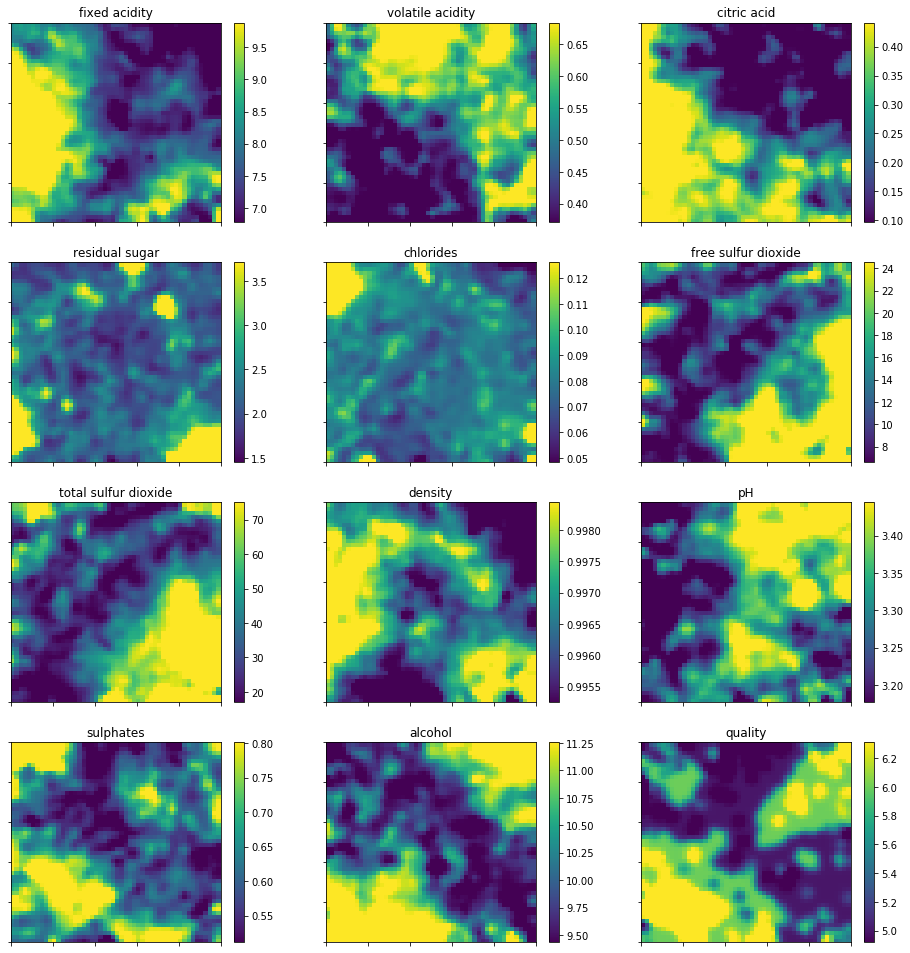

In [67]:
from sompy.visualization.hitmap import HitMapView
from sompy.visualization.mapview import View2D
topographic_error = sm.calculate_topographic_error()
quantization_error = np.mean(sm._bmu[1])
view2D  = View2D(20,20,"rand data",text_size=10)
view2D.show(sm, col_sz=3, which_dim="all", denormalize=True)

D:\soft\Anaconda3\lib\site-packages\sompy-1.1.1-py3.7.egg\sompy\visualization\hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


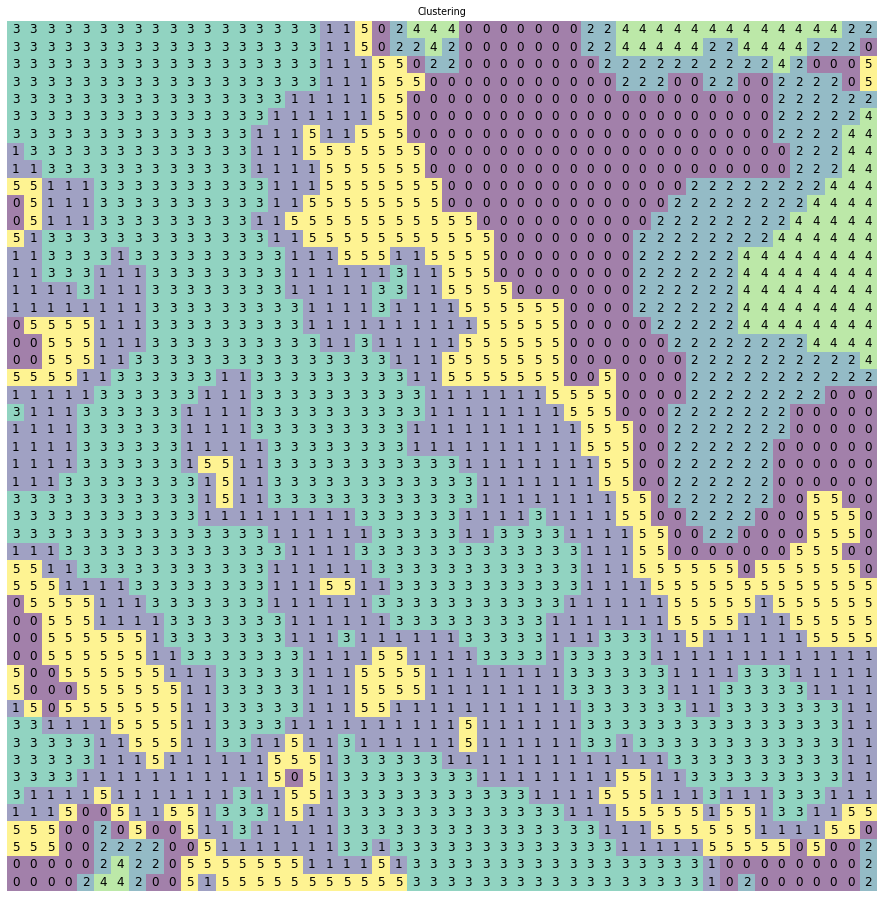

In [77]:
sm.cluster(6)
hits  = HitMapView(20,20,"Clustering",text_size=5)
a=hits.show(sm, labelsize=12)

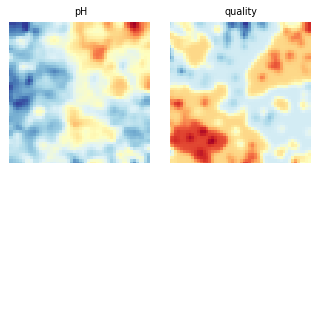

D:\soft\Anaconda3\lib\site-packages\sompy-1.1.1-py3.7.egg\sompy\visualization\mapview.py:163: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(1, 1, 1)


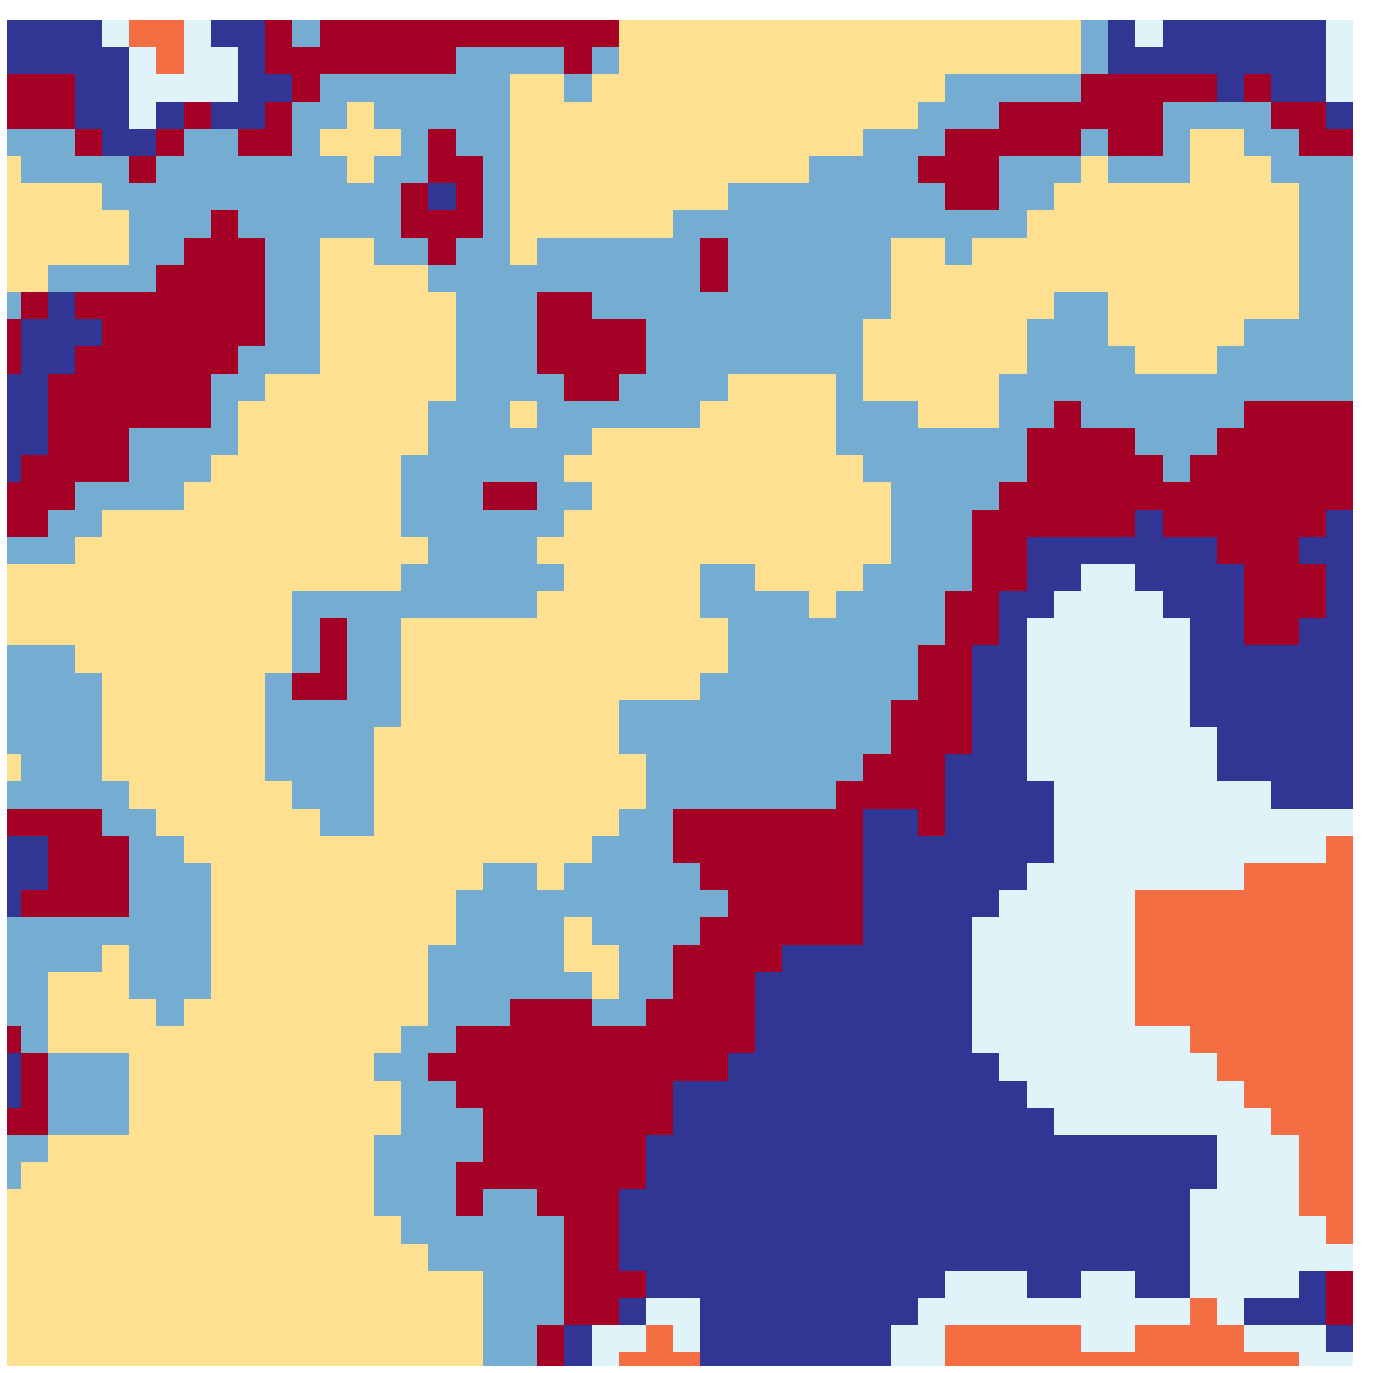

In [78]:
import sompy

v = sompy.mapview.View2DPacked(20, 20, '',text_size=8)
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(sm, what='codebook', which_dim=[8,-1], cmap=None, col_sz=2) #which_dim='all' default
# v.save('2d_packed_test')

v.show(sm, what='cluster')